## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Project Assignment : Neural Network

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Domain: Street View Housing Number Digit Recognition

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Problem Description:
<font color=darkblue>
<ul>
<li>Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making.</li>
<li>A classic example of a corpus of such street-level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360-degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.</li>
<li>More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.</li>
<li>The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.</li>
<li>In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.</li>
</ul>
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Dataset:
<font color=darkblue>SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Learning Outcomes:
<font color=darkblue>
<ul>
<li>Understand the basics of Image Classification</li>
<li>implement a simple image classification pipeline based on a deep neural network</li>
</ul>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Objective:
<font color=darkblue>Using the given dataset (testing and training data), train a model that accurately identifies house numbers in an image (with difficulties like picture brightness, blurriness)</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Import the necessary libraries

In [1]:
import numpy as np
#import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import h5py

import tensorflow
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, optimizers, callbacks
from tensorflow.keras.utils import to_categorical

import math

import os
import warnings

In [2]:
print(tensorflow.__version__)

2.3.1


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
We use tensorflow 2.3.1
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Setting Options

In [3]:
sns.set()
%matplotlib inline

warnings.filterwarnings('ignore')

#pd.options.display.max_columns = None
#pd.options.display.float_format = '{:.7f}'.format
#pd.options.display.max_rows = None


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">1. Read the Data & Understand Train/Test split

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Read the data

In [4]:
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Data Analysis and Preparation

In [5]:
# Load Train, Test and Validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>Lets check the contents of features and labels of one example from the images</font> 

In [6]:
X_train[:1]

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [7]:
y_train[:1]

array([2], dtype=uint8)

In [8]:
X_val[:1]

array([[[ 44.299 ,  45.9999,  51.3306, ...,  25.2764,  27.515 ,
          27.156 ],
        [ 49.1351,  60.3081,  70.1222, ...,  23.7002,  25.2378,
          24.2918],
        [ 60.7595,  83.7141, 102.1961, ...,  24.5044,  24.9712,
          22.8512],
        ...,
        [ 67.1072,  93.2464, 109.2017, ...,  26.6444,  24.6015,
          22.9607],
        [ 24.7569,  36.6417,  48.9071, ...,  21.9268,  21.5309,
          21.5479],
        [ 22.6584,  22.7724,  27.2666, ...,  21.443 ,  20.8191,
          20.0812]]], dtype=float32)

In [9]:
y_val[:1]

array([0], dtype=uint8)

In [10]:
X_test[:1]

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]]], dtype=float32)

In [11]:
y_test[:1]

array([1], dtype=uint8)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Visualize the data
<font color=darkblue>
Let's check out some sample images
</font>

Label for each of the image : 6


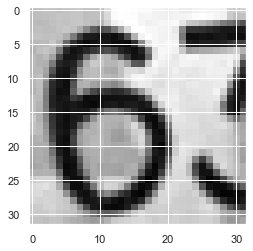

In [12]:
plt.imshow(X_train[1], cmap='gray')
print('Label for each of the image : %s' % (y_train[1]))

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
We can clearly see that we have a partial view of digit 3, that is Noise
</font>

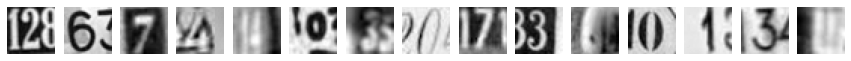

Label for each of the above images : [2 6 7 4 4 0 3 0 7 3 1 0 1 3 1]


In [13]:
#Lets try visualising the first 10 images and their labels
plt.figure(figsize=(15, 1))
for i in range(15):
    plt.subplot(1, 15, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')

plt.show()
print('Label for each of the above images : %s' % (y_train[0:15]))


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
We can clearly see there are lots of noise in data images
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Shape of Data

In [14]:
print(f'Size of X_train is {X_train.shape}')
print(f'Size of y_train is {y_train.shape}\n')

print(f'Size of X_val is {X_val.shape}')
print(f'Size of y_val is {y_val.shape}\n')

print(f'Size of X_test is {X_test.shape}')
print(f'Size of y_test is {y_test.shape}')

Size of X_train is (42000, 32, 32)
Size of y_train is (42000,)

Size of X_val is (60000, 32, 32)
Size of y_val is (60000,)

Size of X_test is (18000, 32, 32)
Size of y_test is (18000,)


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Training dataset(X_train) has 42k records on which we can train upon of matrix size of 32x32 i.e. image size of 32x32</li>
<li>Test dataset(X_test) has 18k records each record being 32x32 in size</li>
<li>y_train, y_test contain label for the given image matrix</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">2. Reshape and Normalize the Train and Test features

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Reshape

In [15]:
X_train = X_train.reshape(X_train.shape[0], 32*32)
X_val = X_val.reshape(X_val.shape[0], 32*32)
X_test = X_test.reshape(X_test.shape[0], 32*32)

In [16]:
print(f'Shape of X_train is {X_train.shape}')
print(f'Shape of X_val is {X_val.shape}')
print(f'Shape of X_test is {X_test.shape}')

Shape of X_train is (42000, 1024)
Shape of X_val is (60000, 1024)
Shape of X_test is (18000, 1024)


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Normalize

In [17]:
print(f'Min value for Train = {X_train.min()}, Validation = {X_val.min()}, Test = {X_test.min()}')
print(f'Max value for Train = {X_train.max()}, Validation = {X_val.max()}, Test = {X_test.max()}')

Min value for Train = 0.0, Validation = 0.0, Test = 0.0
Max value for Train = 254.97450256347656, Validation = 254.97450256347656, Test = 254.97450256347656


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
We see Min value as 0 and Max value as 255
</font>

In [18]:
print('Before Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}')

Before Normalization
Min value is 0.0
Max value is 254.97450256347656


In [19]:
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

In [20]:
print('After Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}')

After Normalization
Min value is 0.0
Max value is 0.9998999834060669


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Normalized the data to update Mix and Max value to 0 and 1
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">3. One Hot Encode the labels of Train/Test data

In [21]:
print(f'Sample value before One Hot Encode {y_train[0]}\n')
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f'Sample value after One Hot Encode {y_train[0]}')

Sample value before One Hot Encode 2

Sample value after One Hot Encode [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
Let's check some other images and labels
</font>

Label for image at index 1 is 2
Label for image at index 2 is 6
Label for image at index 3 is 7
Label for image at index 4 is 4
Label for image at index 5 is 4
Label for image at index 6 is 0
Label for image at index 7 is 3
Label for image at index 8 is 0
Label for image at index 9 is 7
Label for image at index 10 is 3
Label for image at index 11 is 1
Label for image at index 12 is 0
Label for image at index 13 is 1
Label for image at index 14 is 3
Label for image at index 15 is 1


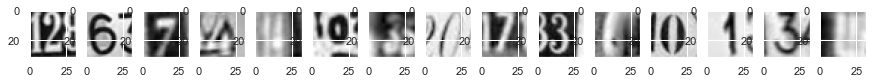

In [22]:
plt.figure(figsize=(15,1))
for i in range(15):
    plt.subplot(1,15,i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    print(f'Label for image at index {i+1} is {np.argmax(y_train[0:15][i])}')

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">4. Define the Model with ReLu and softmax

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Create Basic Model with default values and SGD Optimizer

In [23]:
def build_model(iterations):
    hidden_nodes=256
    output_nodes=10
    iterations=iterations

    #build the model
    model = Sequential()
    model.add(Flatten())
    model.add(Reshape((1024,), input_shape=(32,32,), name='Input_layer'))
    model.add(BatchNormalization())
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))

    model.add(Dense(output_nodes, activation='softmax'))

    #Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    #Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose=1)
    
    scores=[]
    score = model.evaluate(X_train, y_train, verbose=0)
    scores.append(score)
    score = model.evaluate(X_val, y_val, verbose=0)
    scores.append(score)
    score = model.evaluate(X_test, y_test, verbose=0)
    scores.append(score)
    return scores


##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Build / Compile / Fit Model

In [24]:
iterations = 1
lr=0.0001
Lambda=0

scores = build_model(iterations)

42/42 [==============================] - 1s 23ms/step - loss: 2.3426 - accuracy: 0.1363


In [25]:
print(f'Training Dataset Loss is {scores[0][0]} Accuracy is {scores[0][1]}\n')
print(f'Validation Dataset Loss is {scores[1][0]} Accuracy is {scores[1][1]}\n')
print(f'Test Dataset Loss is {scores[2][0]} Accuracy is {scores[2][1]}\n')

Training Dataset Loss is 2.2903120517730713 Accuracy is 0.14945238828659058

Validation Dataset Loss is 2.290642499923706 Accuracy is 0.1490333378314972

Test Dataset Loss is 2.2914154529571533 Accuracy is 0.1480555534362793



#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Both Loss and Accuracy looking reasonable</li>
<li>Loss here is calculated via softmax and crossentropy</li>
<li>Accuracy is probability of being a certain digit among 10 classes is 10%</li>
</ul>
</font>

In [26]:
iterations = 100
lr=0.0001
Lambda=0

scores = build_model(iterations)

Epoch 1/100
42/42 [==============================] - 1s 25ms/step - loss: 2.3758 - accuracy: 0.1155 0s - los
Epoch 2/100
42/42 [==============================] - 1s 24ms/step - loss: 2.2635 - accuracy: 0.1644
Epoch 3/100
42/42 [==============================] - 1s 24ms/step - loss: 2.1926 - accuracy: 0.2231
Epoch 4/100
42/42 [==============================] - 1s 24ms/step - loss: 2.1274 - accuracy: 0.2728
Epoch 5/100
42/42 [==============================] - 1s 24ms/step - loss: 2.0616 - accuracy: 0.3194
Epoch 6/100
42/42 [==============================] - 1s 25ms/step - loss: 1.9948 - accuracy: 0.3579
Epoch 7/100
42/42 [==============================] - 1s 25ms/step - loss: 1.9259 - accuracy: 0.3935
Epoch 8/100
42/42 [==============================] - 1s 24ms/step - loss: 1.8562 - accuracy: 0.4286
Epoch 9/100
42/42 [==============================] - 1s 31ms/step - loss: 1.7871 - accuracy: 0.4586
Epoch 10/100
42/42 [==============================] - 1s 26ms/step - loss: 1.7189 - accurac

42/42 [==============================] - 1s 25ms/step - loss: 0.6692 - accuracy: 0.8071
Epoch 83/100
42/42 [==============================] - 1s 25ms/step - loss: 0.6648 - accuracy: 0.8078
Epoch 84/100
42/42 [==============================] - 1s 25ms/step - loss: 0.6612 - accuracy: 0.8107
Epoch 85/100
42/42 [==============================] - 1s 26ms/step - loss: 0.6565 - accuracy: 0.8123
Epoch 86/100
42/42 [==============================] - 1s 26ms/step - loss: 0.6531 - accuracy: 0.8117
Epoch 87/100
42/42 [==============================] - 1s 26ms/step - loss: 0.6495 - accuracy: 0.8133
Epoch 88/100
42/42 [==============================] - 1s 27ms/step - loss: 0.6457 - accuracy: 0.8147
Epoch 89/100
42/42 [==============================] - 1s 26ms/step - loss: 0.6432 - accuracy: 0.8148
Epoch 90/100
42/42 [==============================] - 1s 26ms/step - loss: 0.6388 - accuracy: 0.8168
Epoch 91/100
42/42 [==============================] - 1s 27ms/step - loss: 0.6344 - accuracy: 0.8169
Epo

In [27]:
print(f'Training Dataset Loss is {scores[0][0]} Accuracy is {scores[0][1]}\n')
print(f'Validation Dataset Loss is {scores[1][0]} Accuracy is {scores[1][1]}\n')
print(f'Test Dataset Loss is {scores[2][0]} Accuracy is {scores[2][1]}\n')


Training Dataset Loss is 0.5953953862190247 Accuracy is 0.8302381038665771

Validation Dataset Loss is 0.6291595101356506 Accuracy is 0.8210166692733765

Test Dataset Loss is 0.7079436182975769 Accuracy is 0.7994999885559082



#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
We can imporve the accuracy and loss with additional layers and better optimizers
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">5. Define the Model with loss as categorical cross-entropy and adam optimizers

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Create Model 2 with more Layers, Dropout Layer, Custom Adam Optimizer and Hyperparameters

In [28]:
def build_model_2(iterations, lr, Lambda, verb=0, eval_test=False):
    hidden_nodes=256
    output_nodes=10
    iterations=iterations
    learning_rate=lr

    #For early stopping of model
    callbacks = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    
    #build the model
    model = Sequential()
    model.add(Flatten())
    model.add(Reshape((1024,), input_shape=(32,32,), name='Input_layer'))
    model.add(BatchNormalization())
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))

    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

    #adam optimizer with custom learning rate
    adam = optimizers.Adam(lr=learning_rate)

    #Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    #Fit the model
    model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=iterations, 
              batch_size=1000, verbose=verb, callbacks=[callbacks])
    
    if eval_test == True:
        scores=[]
        score = model.evaluate(X_train, y_train, verbose=0)
        scores.append(score)
        score = model.evaluate(X_val, y_val, verbose=0)
        scores.append(score)
        score = model.evaluate(X_test, y_test, verbose=0)
        scores.append(score)
        return scores
    else:
        score = model.evaluate(X_val,y_val, verbose=(verb+1)%2)
        return score


###### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Let us try with very low learning rate and zero regularization

In [29]:
iterations=1
lr=0.0001
Lambda=0

#Build the model
scores = build_model_2(iterations, lr, Lambda)

1875/1875 [==============================] - 3s 2ms/step - loss: 2.2846 - accuracy: 0.2062


In [30]:
print(f'Loss is {scores[0]} Accuracy is {scores[1]}\n')

Loss is 2.2845771312713623 Accuracy is 0.20621666312217712



#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Both Loss and Accuracy looking reasonable
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Hyperparameter Tunning
<font color=darkblue>
We can start with coarse values and then tune the model with fine values.
</font>

###### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Very low Learning rate and very low regularization value

In [31]:
iterations=50
lr=1e-7
Lambda=1e-7

#Build the model
scores = build_model_2(iterations, lr, Lambda)

1875/1875 [==============================] - 3s 2ms/step - loss: 2.3390 - accuracy: 0.1007


In [32]:
print(f'\nLoss is {scores[0]} and Accuracy is {scores[1]}')


Loss is 2.339022397994995 and Accuracy is 0.10073333233594894


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Very low learning rate and Lambda results in low accuracy
</font>

###### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Very high learning rate and very high regularization value

In [33]:
iterations=50
lr=1e+7
Lambda=1e+7

#Build the model
scores = build_model_2(iterations, lr, Lambda)

1875/1875 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.1000


In [34]:
print(f'\nLoss is {scores[0]} and Accuracy is {scores[1]}')


Loss is nan and Accuracy is 0.10000000149011612


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Loss exploded because the learning rate is very high
</font>

###### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Narrow learning rate and regularization value

In [35]:
iterations=50
lr=1e-4
Lambda=1e-7

#Build the model
scores = build_model_2(iterations, lr, Lambda)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3847 - accuracy: 0.8901


In [36]:
print(f'\nLoss is {scores[0]} and Accuracy is {scores[1]}')


Loss is 0.38469791412353516 and Accuracy is 0.8901166915893555


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Very good accuracy
</font>

In [37]:
iterations=50
lr=2
Lambda=-2

#Build the model
scores = build_model_2(iterations, lr, Lambda)

1875/1875 [==============================] - 3s 2ms/step - loss: -39737085952.0000 - accuracy: 0.1000


In [38]:
print(f'\nLoss is {scores[0]} and Accuracy is {scores[1]}')


Loss is -39737085952.0 and Accuracy is 0.10000000149011612


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Loss is too high as Learning rate=2 is too high for model
</font>

###### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Finding good Hyperparameter values using random value in a certain range

In [39]:
results=[]
for i in range(10):
    lr=math.pow(10, np.random.uniform(-4.0, 1.0))
    Lambda = math.pow(10, np.random.uniform(-7, -2))
    iternations = 20

    #Build the model
    scores = build_model_2(iterations, lr, Lambda)
    result=f'Loss is {scores[0]}, Accuracy is {scores[1]} with learing rate {lr} and Lambda {Lambda}\n'
    print(result)
    results.append(result)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.3603 - accuracy: 0.8988
Loss is 0.3603304326534271, Accuracy is 0.8987500071525574 with learing rate 0.00011978207637543888 and Lambda 3.3409434529891634e-05

1875/1875 [==============================] - 5s 3ms/step - loss: 0.3990 - accuracy: 0.8849
Loss is 0.3990415334701538, Accuracy is 0.8849499821662903 with learing rate 0.008180139341378683 and Lambda 0.0003846315624649923

1875/1875 [==============================] - 7s 4ms/step - loss: 1549.3623 - accuracy: 0.1000
Loss is 1549.3623046875, Accuracy is 0.10000000149011612 with learing rate 9.283408880370743 and Lambda 0.0002324758980233005

1875/1875 [==============================] - 8s 4ms/step - loss: 2.3428 - accuracy: 0.1000
Loss is 2.3428125381469727, Accuracy is 0.10000000149011612 with learing rate 0.06194920400261697 and Lambda 0.00030502612484135754

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3446 - accuracy: 0.9162
Loss is 0.34455

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
We get good results in range 0.004 to 0.002 for lr and 1e-6 to 1e-4
</font>

###### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Let's run deeper (iterations=100) for this range

In [40]:
results=[]
for i in range(10):
    lr=math.pow(10, np.random.uniform(-4.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7, -4))
    iternations = 100
    
    #Build the model
    scores = build_model_2(iterations, lr, Lambda)

    result=f'Loss is {scores[0]}, Accuracy is {scores[1]} with learing rate {lr} and Lambda {Lambda}\n'
    print(result)
    results.append(result)


1875/1875 [==============================] - 3s 2ms/step - loss: 0.2800 - accuracy: 0.9306
Loss is 0.2800196409225464, Accuracy is 0.930649995803833 with learing rate 0.0016420467268857398 and Lambda 8.193499909103955e-05

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2558 - accuracy: 0.9373
Loss is 0.2558373808860779, Accuracy is 0.9373000264167786 with learing rate 0.0013396640879995113 and Lambda 3.748421829035153e-07

1875/1875 [==============================] - 4s 2ms/step - loss: 600.6096 - accuracy: 0.1000
Loss is 600.6095581054688, Accuracy is 0.10000000149011612 with learing rate 186.23442148192336 and Lambda 1.7938667242111386e-07

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3461 - accuracy: 0.9008
Loss is 0.34612345695495605, Accuracy is 0.9008166790008545 with learing rate 0.005040992594166294 and Lambda 6.641699439734376e-05

1875/1875 [==============================] - 4s 2ms/step - loss: 2.3041 - accuracy: 0.1000
Loss is 2.3040

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Values lr = 0.0007 and Lambda = 1.31e-5 seem a good fit. Let's train this model deep for this value
</font>

In [41]:
iterations = 500
lr= 0.0007
Lambda= 1.31e-05
eval_test= True

#Build the model
scores = build_model_2(iterations, lr, Lambda, 1, eval_test)

Epoch 1/500
42/42 [==============================] - 2s 57ms/step - loss: 1.9252 - accuracy: 0.3290 - val_loss: 1.8158 - val_accuracy: 0.5827
Epoch 2/500
42/42 [==============================] - 2s 54ms/step - loss: 1.1346 - accuracy: 0.6426 - val_loss: 1.4624 - val_accuracy: 0.6807
Epoch 3/500
42/42 [==============================] - 2s 54ms/step - loss: 0.9111 - accuracy: 0.7189 - val_loss: 1.1750 - val_accuracy: 0.7486
Epoch 4/500
42/42 [==============================] - 2s 55ms/step - loss: 0.8109 - accuracy: 0.7469 - val_loss: 0.9916 - val_accuracy: 0.7708
Epoch 5/500
42/42 [==============================] - 2s 54ms/step - loss: 0.7269 - accuracy: 0.7766 - val_loss: 0.8123 - val_accuracy: 0.8000
Epoch 6/500
42/42 [==============================] - 2s 55ms/step - loss: 0.6677 - accuracy: 0.7932 - val_loss: 0.6907 - val_accuracy: 0.8171
Epoch 7/500
42/42 [==============================] - 2s 56ms/step - loss: 0.6204 - accuracy: 0.8071 - val_loss: 0.6098 - val_accuracy: 0.8318
Epoch 

In [42]:
print(f'Training Dataset Loss is {scores[0][0]} Accuracy is {scores[0][1]}\n')
print(f'Validation Dataset Loss is {scores[1][0]} Accuracy is {scores[1][1]}\n')
print(f'Test Dataset Loss is {scores[2][0]} Accuracy is {scores[2][1]}\n')

Training Dataset Loss is 0.10935257375240326 Accuracy is 0.966952383518219

Validation Dataset Loss is 0.26196154952049255 Accuracy is 0.934583306312561

Test Dataset Loss is 0.6180499196052551 Accuracy is 0.8590555787086487



#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Now we can try with more complex model
</font>

###### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model-3 with more hidden layers and neurons

In [43]:
def build_model_3(iterations, lr, Lambda, verb=0, eval_test=False):
    hidden_nodes=500
    output_nodes=10
    iterations=iterations
    learning_rate=lr

    #For early stopping of model
    callbacks = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    
    #build the model
    model = Sequential()
    model.add(Flatten())
    model.add(Reshape((1024,), input_shape=(32,32,), name='Input_layer'))
    model.add(BatchNormalization())
    model.add(Dense(100,activation='relu'))
    model.add(Dense(50,activation='relu'))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))

    model.add(Dropout(0.5))
    
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))

    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

    #adam optimizer with custom learning rate
    adam = optimizers.Adam(lr=learning_rate)

    #Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    #Fit the model
    model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=iterations, 
              batch_size=1000, verbose=verb, callbacks=[callbacks])
    
    if eval_test == True:
        scores=[]
        score = model.evaluate(X_train, y_train, verbose=0)
        scores.append(score)
        score = model.evaluate(X_val, y_val, verbose=0)
        scores.append(score)
        score = model.evaluate(X_test, y_test, verbose=0)
        scores.append(score)
        return scores
    else:
        score = model.evaluate(X_val,y_val, verbose=(verb+1)%2)
        return score


###### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Let us try with very low learning rate and zero regularization

In [44]:
iterations = 1
lr=0.0001
Lambda=0
eval_test= True

#Build the model
scores = build_model_3(iterations, lr, Lambda, 1, eval_test)

42/42 [==============================] - 2s 55ms/step - loss: 2.3230 - accuracy: 0.1030 - val_loss: 2.3016 - val_accuracy: 0.1083


In [46]:
print(f'Training Dataset Loss is {scores[0][0]} Accuracy is {scores[0][1]}\n')

Training Dataset Loss is 2.301564931869507 Accuracy is 0.10914285480976105



In [47]:
results=[]
print('Evaluating Validation data\n')
for i in range(30):
    lr=math.pow(10, np.random.uniform(-4.0, 1.0))
    Lambda = math.pow(10, np.random.uniform(-7, -4))
    iternations = 20
    
    #Build the model
    scores = build_model_3(iterations, lr, Lambda)

    result=f'Loss is {scores[0]}, Accuracy is {scores[1]} with learing rate {lr} and Lambda {Lambda}\n'
    print(result)
    results.append(result)


Evaluating Validation data

1875/1875 [==============================] - 6s 3ms/step - loss: 2.3004 - accuracy: 0.1116
Loss is 2.3004226684570312, Accuracy is 0.11155000329017639 with learing rate 0.00021336549961188512 and Lambda 1.1901540289974896e-07

1875/1875 [==============================] - 5s 3ms/step - loss: 2.3000 - accuracy: 0.1294
Loss is 2.3000266551971436, Accuracy is 0.12935000658035278 with learing rate 0.0008346107253624351 and Lambda 8.353784660100571e-05

1875/1875 [==============================] - 6s 3ms/step - loss: 2.2912 - accuracy: 0.1319
Loss is 2.2912402153015137, Accuracy is 0.131850004196167 with learing rate 0.004929698842938674 and Lambda 2.8953513562135882e-06

1875/1875 [==============================] - 5s 3ms/step - loss: 2.3006 - accuracy: 0.1227
Loss is 2.3005857467651367, Accuracy is 0.12271666526794434 with learing rate 0.0005694970648953547 and Lambda 2.3251630588511405e-07

1875/1875 [==============================] - 5s 3ms/step - loss: 2.3152

In [52]:
results=[]
print('Evaluating Validation data\n')
for i in range(30):
    lr=math.pow(10, np.random.uniform(-4, -3))
    Lambda = math.pow(10, np.random.uniform(-5, -1))
    iternations = 100
    
    #Build the model
    scores = build_model_3(iterations, lr, Lambda)

    result=f'Loss is {scores[0]}, Accuracy is {scores[1]} with learing rate {lr} and Lambda {Lambda}\n'
    print(result)
    results.append(result)

Evaluating Validation data

1875/1875 [==============================] - 6s 3ms/step - loss: 2.3275 - accuracy: 0.1239
Loss is 2.3275041580200195, Accuracy is 0.1239333301782608 with learing rate 0.00010562924347502043 and Lambda 0.0014888809078131499

1875/1875 [==============================] - 5s 3ms/step - loss: 2.3042 - accuracy: 0.1142
Loss is 2.3042209148406982, Accuracy is 0.11418333649635315 with learing rate 0.00025145135719627535 and Lambda 0.00014317578147147577

1875/1875 [==============================] - 5s 3ms/step - loss: 2.3048 - accuracy: 0.1151
Loss is 2.30478572845459, Accuracy is 0.11508333683013916 with learing rate 0.0001259653979554424 and Lambda 0.00017157349728551271

1875/1875 [==============================] - 5s 3ms/step - loss: 2.3024 - accuracy: 0.1055
Loss is 2.302396535873413, Accuracy is 0.10546666383743286 with learing rate 0.00048085270605742274 and Lambda 4.9382311140088346e-05

1875/1875 [==============================] - 5s 3ms/step - loss: 3.557

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">6. Final Evaluation

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model with finalize hyperparmeters for Test set validation
<font color=darkblue>
</font>

In [54]:
lr=0.0007
Lambda=1.31e-05
iterations=500
eval_test=True

#Build the model
scores = build_model_3(iterations, lr, Lambda, 1, eval_test)

Epoch 1/500
42/42 [==============================] - 3s 61ms/step - loss: 2.3038 - accuracy: 0.1090 - val_loss: 2.2995 - val_accuracy: 0.1390
Epoch 2/500
42/42 [==============================] - 2s 51ms/step - loss: 2.1649 - accuracy: 0.1827 - val_loss: 2.1641 - val_accuracy: 0.2841
Epoch 3/500
42/42 [==============================] - 2s 53ms/step - loss: 1.8730 - accuracy: 0.3001 - val_loss: 1.8982 - val_accuracy: 0.4238
Epoch 4/500
42/42 [==============================] - 2s 53ms/step - loss: 1.6640 - accuracy: 0.3947 - val_loss: 1.6641 - val_accuracy: 0.5437
Epoch 5/500
42/42 [==============================] - 2s 55ms/step - loss: 1.4972 - accuracy: 0.4661 - val_loss: 1.4331 - val_accuracy: 0.6026
Epoch 6/500
42/42 [==============================] - 2s 55ms/step - loss: 1.3968 - accuracy: 0.5053 - val_loss: 1.2803 - val_accuracy: 0.6273
Epoch 7/500
42/42 [==============================] - 2s 52ms/step - loss: 1.3239 - accuracy: 0.5341 - val_loss: 1.1690 - val_accuracy: 0.6479
Epoch 

42/42 [==============================] - 2s 51ms/step - loss: 0.5760 - accuracy: 0.8194 - val_loss: 0.4849 - val_accuracy: 0.8558
Epoch 59/500
42/42 [==============================] - 2s 51ms/step - loss: 0.5761 - accuracy: 0.8221 - val_loss: 0.4903 - val_accuracy: 0.8546
Epoch 60/500
42/42 [==============================] - 2s 51ms/step - loss: 0.5705 - accuracy: 0.8232 - val_loss: 0.5131 - val_accuracy: 0.8463
Epoch 61/500
42/42 [==============================] - 2s 52ms/step - loss: 0.5888 - accuracy: 0.8161 - val_loss: 0.5155 - val_accuracy: 0.8434
Epoch 62/500
42/42 [==============================] - 2s 51ms/step - loss: 0.5788 - accuracy: 0.8208 - val_loss: 0.4818 - val_accuracy: 0.8563
Epoch 63/500
42/42 [==============================] - 2s 51ms/step - loss: 0.5640 - accuracy: 0.8243 - val_loss: 0.4788 - val_accuracy: 0.8589
Epoch 64/500
42/42 [==============================] - 2s 52ms/step - loss: 0.5692 - accuracy: 0.8234 - val_loss: 0.4961 - val_accuracy: 0.8523
Epoch 65/500

In [55]:
print(f'Training Dataset Loss is {scores[0][0]} Accuracy is {scores[0][1]}\n')
print(f'Validation Dataset Loss is {scores[1][0]} Accuracy is {scores[1][1]}\n')
print(f'Test Dataset Loss is {scores[2][0]} Accuracy is {scores[2][1]}\n')

Training Dataset Loss is 0.42853739857673645 Accuracy is 0.8718571662902832

Validation Dataset Loss is 0.4812130630016327 Accuracy is 0.8563666939735413

Test Dataset Loss is 0.604123055934906 Accuracy is 0.8202221989631653



##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Final Evaluate
<font color=darkblue>
</font>

In [59]:
print("Test Data Loss:", scores[2][0])
print("Test Data Accuracy:", scores[2][1])

Test Data Loss: 0.604123055934906
Test Data Accuracy: 0.8202221989631653


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Test Data Loss is 0.6041</li>
<li>Test Data Accuracy is 0.8202</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Conclusion :
<font color=darkblue>
<ul>
<li>There are 10 classes in dataset</li>
<li>We created a Neural Network with dense hidden layers of different number of units</li>
<li>We first tried basic model with ReLu and softmax activation and SGD optimizer</li>
<li>Next we tried with ADAM optimizer with ReLu and softmax</li>
<li>Next we tired changing hyperparameters, number of hidden layers, neurons to find the best accuracy</li>
<li>Final Test Accuracy we achieved is 82.02%</li>
</ul>
</font>